## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
full_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
number_of_mice = len(full_data['Mouse ID'])
number_of_mice

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice_ids = full_data.loc[full_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupe_mice_ids


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_data = full_data.loc[full_data["Mouse ID"] == "g989"]
dupe_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [144]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = full_data[full_data["Mouse ID"] != dupe_mice_ids[0]]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_vol = clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_vol = clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variances_vol = clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_vol = clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_vol = clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

vol_sum_df = pd.DataFrame(mean_vol)
vol_summary_df = vol_sum_df.rename(columns={"Tumor Volume (mm3)":"Mean"})

vol_summary_df["Median"] = median_vol
vol_summary_df["Variances"] = variances_vol
vol_summary_df["Std"] = std_vol
vol_summary_df["SEM"] = sem_vol

vol_summary_df


,Mean,Median,Variances,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

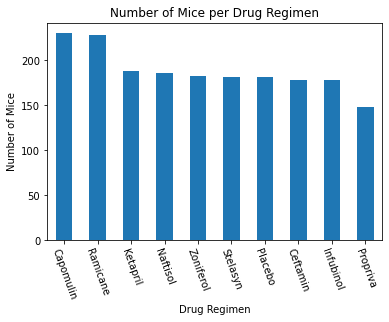

In [120]:
 # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Drug_Regimen = ['Capomulin', 'Ramicane', 'Ketapril','Naftisol','Zoniferol', 'Stelasyn',
                 'Placebo', 'Ceftamin', 'Infubinol','Propriva']

number_mice = list(clean_data['Drug Regimen'].value_counts()) 
x_axis = np.arange(len(number_mice))

df = pd.DataFrame({'Drug Regimen': Drug_Regimen,
                   'Number of Mice': number_mice}, index= Drug_Regimen)
ax = df.plot.bar(x='Drug Regimen', y='Number of Mice',  rot = -70, legend=False)
plt.title("Number of Mice per Drug Regimen")
plt.ylabel("Number of Mice")



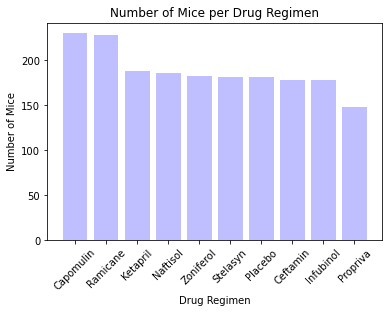

In [121]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Drug_Regimen = ['Capomulin', 'Ramicane', 'Ketapril','Naftisol','Zoniferol', 'Stelasyn',
                 'Placebo', 'Ceftamin', 'Infubinol','Propriva']

number_mice = list(clean_data['Drug Regimen'].value_counts())
x_axis = np.arange(len(number_mice))

plt.bar(x_axis,number_mice, color="b", align="center",alpha=0.25);
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,['Capomulin', 'Ramicane', 'Ketapril','Naftisol','Zoniferol', 'Stelasyn',
                 'Placebo', 'Ceftamin', 'Infubinol','Propriva']);
plt.xticks(rotation=45)

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice");


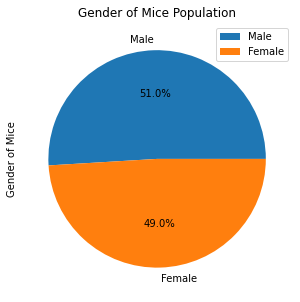

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = clean_data['Sex'].value_counts()
gender = ["Male","Female"]

df = pd.DataFrame({'Gender of Mice': mice_gender}, index= ['Male','Female'])
plot = df.plot.pie(y='Gender of Mice', figsize=(5,5),autopct="%1.1f%%")
plt.title("Gender of Mice Population")
plt.show()


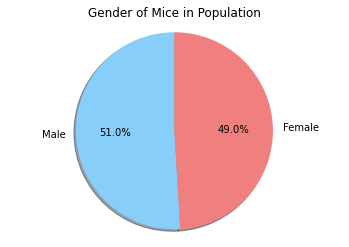

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = clean_data['Sex'].value_counts()
gender = ["Male","Female"]
colors = ["lightskyblue", "lightcoral"]
plt.title("Gender of Mice in Population")
plt.pie(mice_gender, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [232]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = clean_data.loc[clean_data["Drug Regimen"]== 'Capomulin',:]
ramicane_df = clean_data.loc[clean_data["Drug Regimen"]=='Ramicane',:]
infubinol_df = clean_data.loc[clean_data["Drug Regimen"]=='Infubinol',:]
ceftamin_df = clean_data.loc[clean_data["Drug Regimen"]== 'Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_df_max = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_df_max = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_df_max = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_df_max = infubinol_df.groupby("Mouse ID").max()["Timepoint"]

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_mer = pd.DataFrame(capomulin_df_max)
capomulin_merg = pd.merge(capomulin_mer, clean_data, on=("Mouse ID", "Timepoint"), how="left")

ramicane_mer = pd.DataFrame(ramicane_df_max)
ramicane_merg = pd.merge(ramicane_mer, clean_data, on=("Mouse ID", "Timepoint"), how="left")

infubinol_mer = pd.DataFrame(infubinol_df_max)
infubinol_merg = pd.merge(infubinol_mer, clean_data, on=("Mouse ID", "Timepoint"), how="left")

ceftamin_mer = pd.DataFrame(infubinol_df_max)
ceftamin_merg = pd.merge(ceftamin_mer, clean_data, on=("Mouse ID", "Timepoint"), how="left")



In [230]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Hi, I am not sure way the directions called for a 'for loop', but they are above.


# capomulin_merg_list = []
# for index, row in capomulin_merg.iterrows():
#     capomulin_merg_list.append(row['Tumor Volume (mm3)'])

# ramicane_merg_list = []
# for index, row in ramicane_merg.iterrows():
#     ramicane_merg_list.append(row['Tumor Volume (mm3)'])

# infubinol_merg_list = []
# for index, row in infubinol_merg.iterrows():
#     infubinol_merg_list.append(row['Tumor Volume (mm3)'])
    
# ceftamin_merg_list = []
# for index, row in ceftamin_merg.iterrows():
#     ceftamin_merg_list.append(row['Tumor Volume (mm3)'])


ceft = ceftamin_merg['Tumor Volume (mm3)']   
inf = infubinol_merg['Tumor Volume (mm3)']
ram = ramicane_merg['Tumor Volume (mm3)']
cap = capomulin_merg['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceft_quartiles = ceft.quantile([.25,.5,.75])
ceft_lowerquant = ceft_quartiles[.25]
ceft_upperquant = ceft_quartiles[.75]
ceft_iqr = ceft_upperquant - ceft_lowerquant

inf_quartiles = inf.quantile([.25,.5,.75])
inf_lowerquant = inf_quartiles[.25]
inf_upperquant = inf_quartiles[.75]
inf_iqr = inf_upperquant - inf_lowerquant

ram_quartiles = ram.quantile([.25,.5,.75])
ram_lowerquant = ram_quartiles[.25]
ram_upperquant = ram_quartiles[.75]
ram_iqr = ram_upperquant - ram_lowerquant

cap_quartiles = cap.quantile([.25,.5,.75])
cap_lowerquant = cap_quartiles[.25]
cap_upperquant = cap_quartiles[.75]
cap_iqr = cap_upperquant - cap_lowerquant
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
ceft_lower_bound = ceft_lowerquant - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperquant + (1.5*ceft_iqr)

inf_lower_bound = inf_lowerquant - (1.5*inf_iqr)
inf_upper_bound = inf_upperquant + (1.5*inf_iqr)

ram_lower_bound = ram_lowerquant - (1.5*ram_iqr)
ram_upper_bound = ram_upperquant + (1.5*ram_iqr)

cap_lower_bound = cap_lowerquant - (1.5*ceft_iqr)
cap_upper_bound = cap_upperquant + (1.5*ceft_iqr)


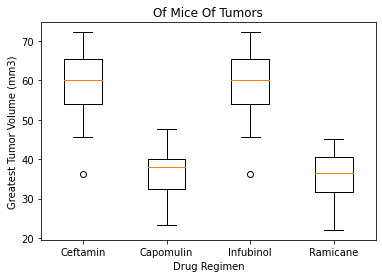

In [231]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fin_vol = [ceft, cap, inf, ram]

fig1,drug = plt.subplots()
drug.set_title('Of Mice Of Tumors')
drug.set_ylabel('Greatest Tumor Volume (mm3)')
drug.set_xlabel('Drug Regimen')

drug.boxplot(fin_vol, labels=["Ceftamin",'Capomulin','Infubinol',"Ramicane"])

plt.show()


In [233]:
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


## Line and Scatter Plots

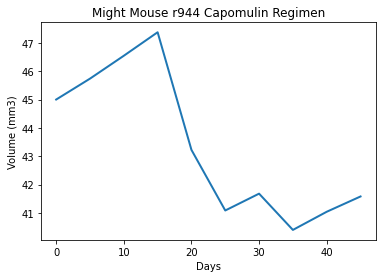

In [240]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mighty_mouse = capomulin_df.loc[capomulin_df['Mouse ID']=='r944',:]

mighty_vol = mighty_mouse["Tumor Volume (mm3)"]
mighty_time = mighty_mouse["Timepoint"]

plt.title('Might Mouse r944 Capomulin Regimen')
plt.plot(mighty_time, mighty_vol, linewidth=2, markersize=12)
plt.ylabel('Volume (mm3)')
plt.xlabel('Days')


plt.show()



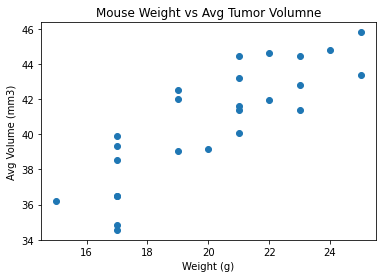

In [251]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mice_sct = capomulin_df.groupby(['Mouse ID']).mean()

x_values = mice_sct['Weight (g)']
y_values = mice_sct['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)

plt.title('Mouse Weight vs Avg Tumor Volumne')
plt.ylabel('Avg Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()



## Correlation and Regression

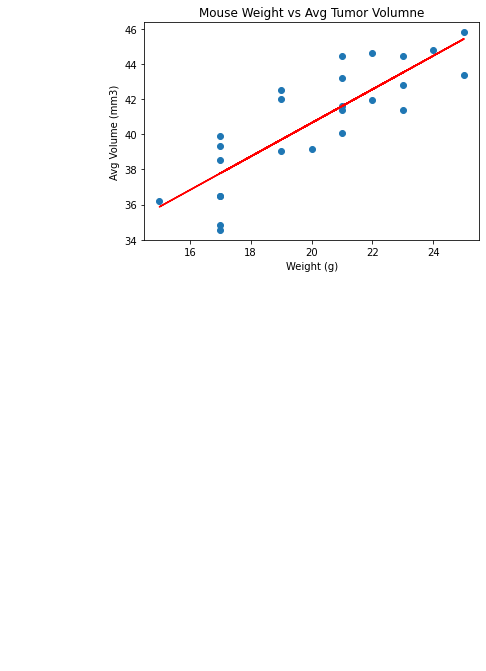

In [273]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mice_sct = capomulin_df.groupby(['Mouse ID']).mean()
x_values = mice_sct['Weight (g)']
y_values = mice_sct['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=10,color="red")

plt.title('Mouse Weight vs Avg Tumor Volumne')
plt.ylabel('Avg Volume (mm3)')
plt.xlabel('Weight (g)');
